In [13]:
import pandas as pd
import numpy as np

### Data Overview

In [14]:
data=pd.read_csv('E-Commerce data.csv')

In [15]:
data.head()

,Purchase_Price,Product_Rating,Usage_Duration,Number_of_Reviews,Delivery_Time,Discount_Percentage,Customer_Age,Payment_Type,Product_Category,Customer_Satisfaction,Return_Likelihood
0,193.52,1.0,105.0,0.0,14.0,20.14,42.0,NaN,Toys,1.0,0
1,475.85,4.0,66.0,85.0,13.0,10.66,54.0,Credit Card,Furniture,10.0,1
2,368.68,1.0,263.0,337.0,2.0,36.95,32.0,Credit Card,Toys,6.0,1
3,303.34,2.0,49.0,429.0,2.0,41.60,21.0,Cash on Delivery,Books,3.0,0
4,86.45,1.0,16.0,68.0,14.0,39.81,31.0,Credit Card,Books,9.0,1


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Purchase_Price         4275 non-null   float64
 1   Product_Rating         4275 non-null   float64
 2   Usage_Duration         4275 non-null   float64
 3   Number_of_Reviews      4275 non-null   float64
 4   Delivery_Time          4275 non-null   float64
 5   Discount_Percentage    4275 non-null   float64
 6   Customer_Age           4278 non-null   float64
 7   Payment_Type           4275 non-null   object 
 8   Product_Category       4275 non-null   object 
 9   Customer_Satisfaction  4275 non-null   float64
 10  Return_Likelihood      4500 non-null   int64  
dtypes: float64(8), int64(1), object(2)
memory usage: 386.8+ KB


In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Purchase_Price,4275.0,274.367703,294.098044,10.01,131.110,257.91,379.17,4983.80
Product_Rating,4275.0,2.960234,1.427653,1.00,2.000,3.00,4.00,5.00
Usage_Duration,4275.0,182.778713,106.504357,1.00,87.500,183.00,275.00,364.00
Number_of_Reviews,4275.0,247.672281,143.368415,0.00,126.000,247.00,371.00,499.00
Delivery_Time,4275.0,7.486550,4.044962,1.00,4.000,8.00,11.00,14.00
Discount_Percentage,4275.0,34.704550,20.148393,0.00,17.145,34.62,52.08,69.98
Customer_Age,4278.0,41.832398,14.675054,18.00,30.000,41.00,53.00,100.00
Customer_Satisfaction,4275.0,5.581520,2.856182,1.00,3.000,6.00,8.00,10.00
Return_Likelihood,4500.0,0.687556,0.774784,0.00,0.000,0.00,1.00,2.00


Our dataset consistes of E-Commerce products purchase data which included chance of returning the purchaced product as target variable. if it is 0 no return, if it is 1 likely to return and if it is 2 then the product will definetly return. based on the reting, discount, no.of reviews of product and type of product and more features....

### Handeling Missing Values

In [18]:
#let us check is there any missing data or null values is present or not
data.isnull().sum()

,0
Purchase_Price,225
Product_Rating,225
Usage_Duration,225
Number_of_Reviews,225
Delivery_Time,225
Discount_Percentage,225
Customer_Age,222
Payment_Type,225
Product_Category,225
Customer_Satisfaction,225


Yes there are some Null values are present in our data. we will impute them without removing them from data withoute occurance of data lose

In [19]:
# will select numarical columns
num_cols=data.select_dtypes(include=np.number).columns
num_cols

Index(['Purchase_Price', 'Product_Rating', 'Usage_Duration',
       'Number_of_Reviews', 'Delivery_Time', 'Discount_Percentage',
       'Customer_Age', 'Customer_Satisfaction', 'Return_Likelihood'],
      dtype='object')

In [20]:
# will impute them with their average values
data[num_cols]=data[num_cols].fillna(data[num_cols].mean())

In [21]:
data.isnull().sum()

,0
Purchase_Price,0
Product_Rating,0
Usage_Duration,0
Number_of_Reviews,0
Delivery_Time,0
Discount_Percentage,0
Customer_Age,0
Payment_Type,225
Product_Category,225
Customer_Satisfaction,0


In [22]:
data['Payment_Type'].fillna(data['Payment_Type'].mode()[0],inplace=True)

<ipython-input-22-d818e179bdf5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Payment_Type'].fillna(data['Payment_Type'].mode()[0],inplace=True)


In [23]:
data['Product_Category'].fillna(data['Product_Category'].mode()[0],inplace=True)

<ipython-input-23-385a056f415b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Product_Category'].fillna(data['Product_Category'].mode()[0],inplace=True)


In [24]:
data.isnull().sum()

,0
Purchase_Price,0
Product_Rating,0
Usage_Duration,0
Number_of_Reviews,0
Delivery_Time,0
Discount_Percentage,0
Customer_Age,0
Payment_Type,0
Product_Category,0
Customer_Satisfaction,0


We successfully imputed all the null vaues without causing the loosing the data.

### Handeling Outliers

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

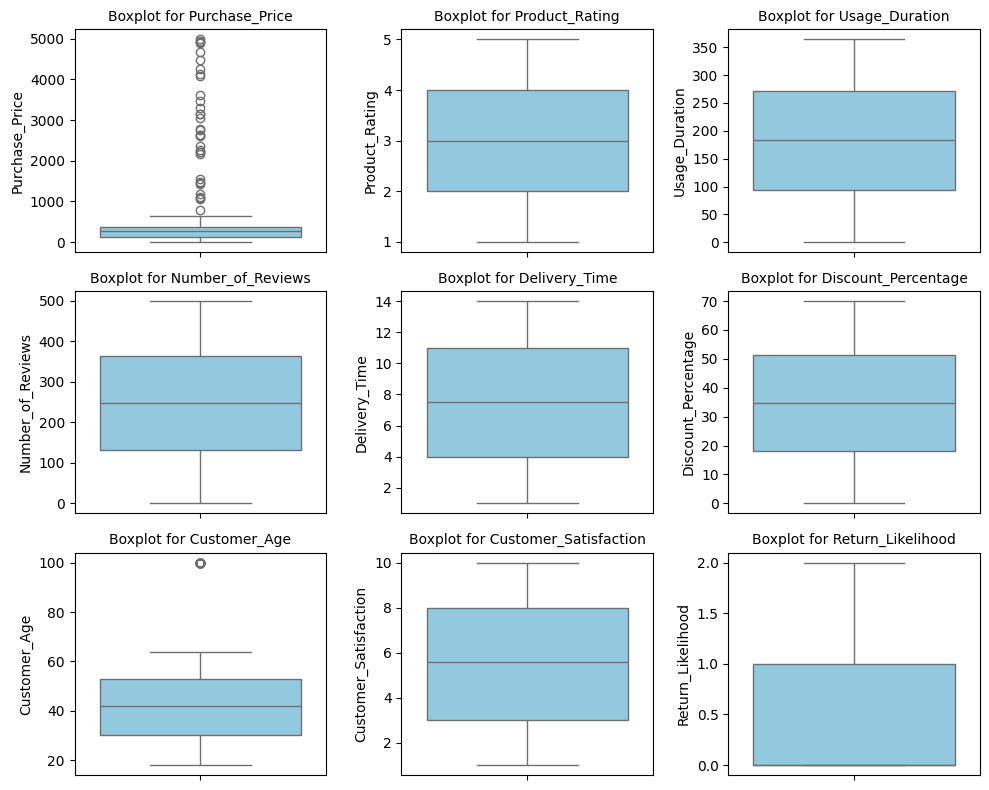

In [27]:
plt.figure(figsize=(10, 8))
for i, feature in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data[feature], color='skyblue')
    plt.title(f'Boxplot for {feature}', fontsize=10)
    plt.xlabel('')

plt.tight_layout()
plt.show()

We can see that in the Purchase_Price consist more outliers. this will affetc the model performance. let us fix them

In [28]:
Q1=data['Purchase_Price'].quantile(0.25)
Q3=data['Purchase_Price'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

In [30]:
data['Purchase_Price'] = data['Purchase_Price'].apply(
    lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

In [33]:
data['Purchase_Price'].describe()

,Purchase_Price
count,4500.000000
mean,258.277226
std,144.103008
min,10.010000
25%,137.295000
50%,271.435000
75%,371.380000
max,722.507500


### Visualization Of trends and patterns of data

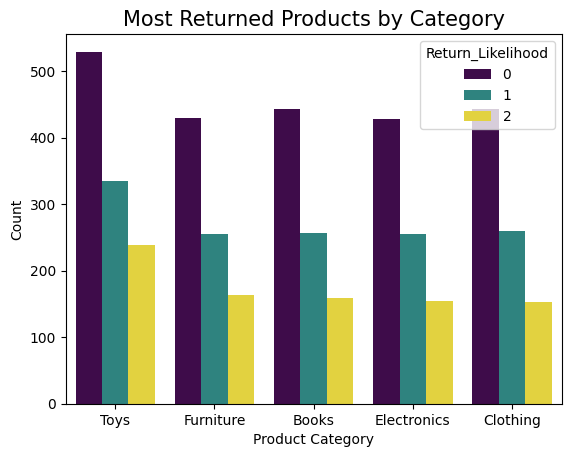

In [37]:
sns.countplot(data=data, x='Product_Category', hue='Return_Likelihood', palette='viridis')
plt.title('Most Returned Products by Category', fontsize=15)
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.show()

We can see that Most returned products are the Toys. Remaining all the categories are in the same count nearly.

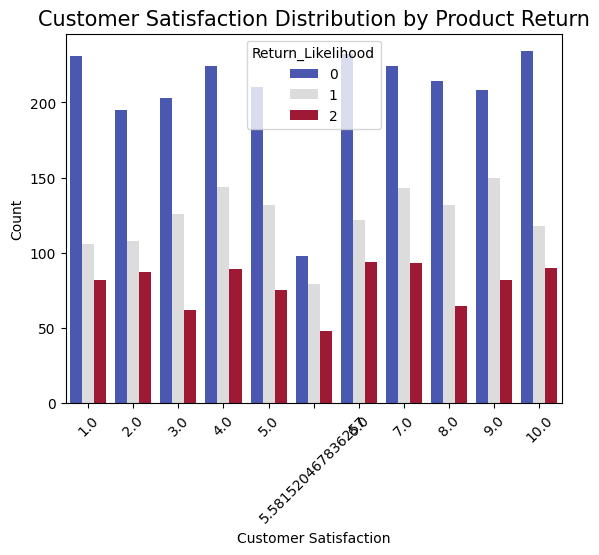

In [38]:
sns.countplot(data=data, x='Customer_Satisfaction', hue='Return_Likelihood', palette='coolwarm')
plt.title('Customer Satisfaction Distribution by Product Return', fontsize=15)
plt.xlabel('Customer Satisfaction')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

We can absorve that The average customer satisfaction products are returned more

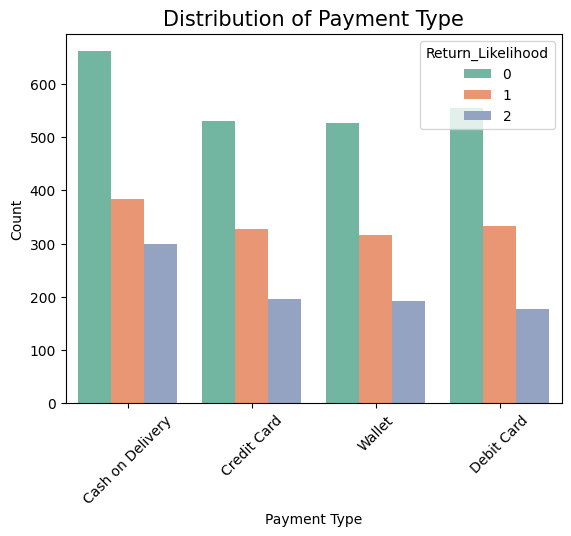

In [41]:
# Countplot of Payment_Type
sns.countplot(data=data, x='Payment_Type', hue='Return_Likelihood',palette='Set2')
plt.title('Distribution of Payment Type', fontsize=15)
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

There we can see that most of the returned products are Cash On Delivery products

### Data Preprocessing

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [43]:
label_encoder = LabelEncoder()

In [44]:
data['Product_Category'] = label_encoder.fit_transform(data['Product_Category'])
data['Customer_Satisfaction'] = label_encoder.fit_transform(data['Customer_Satisfaction'])
data['Payment_Type'] = label_encoder.fit_transform(data['Payment_Type'])

In [45]:
x=data.drop('Return_Likelihood',axis=1)
y=data['Return_Likelihood']

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

### Model Building and Training

In [47]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [48]:
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [49]:
y_pred=model.predict(x_test)

In [53]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.50


In [51]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       449
           1       0.00      0.00      0.00       279
           2       0.00      0.00      0.00       172

    accuracy                           0.50       900
   macro avg       0.17      0.33      0.22       900
weighted avg       0.25      0.50      0.33       900



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [52]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[449   0   0]
 [279   0   0]
 [172   0   0]]


An accuracy of 0.50 indicates that the model is performing at the level of random guessing, which is not ideal.